In [ ]:
# importing pandas as pd
import pandas as pd

# importing numpy as np
import numpy as np

#importing seaborn as sns
import seaborn as sns

#importing matplot as mp
import matplotlib.pyplot as plt


In [ ]:
# reading the data from the local file
data=pd.read_csv('/content/drive/MyDrive/project/flag.data')
# creating a dataframe using pandas library
df=pd.DataFrame(data)

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# as written in the provided link, we have 193 instances(rows) and 30 features(columns)
df.shape

(193, 30)

### Taking a look on the data

In [ ]:
df

,Afghanistan,5,1,648,16,10,2,0,3,5.1,...,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
189,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
190,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
191,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


#### The dataframe doesnt include the column names, because the data and the column names are placed is seperate files..

In [ ]:
lis = df.columns

In [ ]:
columns = ['name','landmass','zone','area','population','language','religion','bars','stripes','colors','red',\
           'green','blue','gold','white','black','orange','mainhue','circles','crosses','saltires','quarters',\
           'sunstars','crescent','triangle','icon','animate','text','topleft','botright']
len(columns)

30

In [ ]:
df.head()

,Afghanistan,5,1,648,16,10,2,0,3,5.1,...,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black


### Turn the column names in to a normal row

In [ ]:
df=pd.DataFrame(np.vstack([df.columns, df]))

### Add the column names!

In [ ]:
df.columns=columns
df

,name,landmass,zone,area,population,language,religion,bars,stripes,colors,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5.1,...,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


### Function that takes a columns index as a parameter and returns the index of all non numeric values cells, and prints the cell and the value it holds in the column if non numeric cell found

In [ ]:
def find_non_numeric(dframe,col):
    non_numeric_index=[]
    index=0
    for item in dframe[dframe.columns[col]]:
        if (type(item)!=int):
            #print("Index",index,"is type",type(item))
            non_numeric_index.append(index)
        index+=1
    return non_numeric_index

### Function that takes column index and a list of indeces and turns the indeces' cells into int datatype

In [ ]:
def convert_cell_into_numeric(dframe,index_list,col):
    for i in index_list:
        if(type(dframe[dframe.columns[col]][i])==float):
            continue
        ##dont convert cells that are float into int (to prevent falsely manipulating data)
        ##else, convert to int
        dframe[dframe.columns[col]][i]=int(float(dframe[dframe.columns[col]][i]))
        print("Converted index",i,"in column[",dframe.columns[col],"]to int")

### Finding out which cells in each column have non int values

In [ ]:
for i in range(len(df.columns)):
    print("[",df.columns[i],"]:",find_non_numeric(df,i))

[ name ]: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193]
[ landmass ]: [0]
[ zone ]: [0]
[ area ]: [0]
[ population ]: [0]
[ language ]: [0]
[ religion ]: [0]
[ bars ]: [0]
[ stripes ]: 

### Converting all non numerical data to intiger, excluding columns that store string datatype by default

In [ ]:
modified_df=df.drop(columns=['name','mainhue','topleft','botright'])
for i in range(0,len(modified_df.columns)):
    convert_cell_into_numeric(modified_df,find_non_numeric(modified_df,i),i)

Converted index 0 in column[ landmass ]to int
Converted index 0 in column[ zone ]to int
Converted index 0 in column[ area ]to int
Converted index 0 in column[ population ]to int
Converted index 0 in column[ language ]to int
Converted index 0 in column[ religion ]to int
Converted index 0 in column[ bars ]to int
Converted index 0 in column[ stripes ]to int
Converted index 0 in column[ colors ]to int
Converted index 0 in column[ red ]to int
Converted index 0 in column[ green ]to int
Converted index 0 in column[ blue ]to int
Converted index 0 in column[ gold ]to int
Converted index 0 in column[ white ]to int
Converted index 0 in column[ black ]to int
Converted index 0 in column[ orange ]to int
Converted index 0 in column[ circles ]to int
Converted index 0 in column[ crosses ]to int
Converted index 0 in column[ saltires ]to int
Converted index 0 in column[ quarters ]to int
Converted index 0 in column[ sunstars ]to int
Converted index 0 in column[ crescent ]to int
Converted index 0 in column

#### After reading the flag.name file (which descibes the dataset) I came to conclusion that drawing a heatmap would be beneficial to understand the data further; obviously some of the columns need some preprocessing before passing them into the heatmap function..

In [ ]:
heatmap_columns=['zone','population','language','religion','mainhue']
df['religion'].value_counts()
#for col in heatmap_columns:
#   print("Column[",col,"]\n",df[col].value_counts())

1    60
0    40
2    35
5    27
6    15
3     8
4     4
7     4
2     1
Name: religion, dtype: int64

### Handeling noisy data in the boolean columns
#### I will consider cells that have values more than 0.5 a 1, else is 0
#### Note that this might not be the best way to handle the noisy data, but I this is the only logical method that I can think of

In [ ]:
def remove_noise_from_bool_cols(dframe,col):
    for i in range(dframe[col].count()):
        if (dframe[col][i]<0.5):
            dframe[col][i]=0
        else:
            dframe[col][i]=1
###Impleneted a function to prevent code repetition, again..

In [ ]:
for col_name in ["red","green","blue","gold","white","black","orange","crescent","triangle","icon","animate","text"]:
    remove_noise_from_bool_cols(modified_df,col_name)
    print(modified_df[col_name].value_counts())


1    153
0     41
Name: red, dtype: int64
0    103
1     91
Name: green, dtype: int64
1    99
0    95
Name: blue, dtype: int64
0    103
1     91
Name: gold, dtype: int64
1    146
0     48
Name: white, dtype: int64
0    142
1     52
Name: black, dtype: int64
0    168
1     26
Name: orange, dtype: int64
0    183
1     11
Name: crescent, dtype: int64
0    167
1     27
Name: triangle, dtype: int64
0    145
1     49
Name: icon, dtype: int64
0    155
1     39
Name: animate, dtype: int64
0    178
1     16
Name: text, dtype: int64


### Drawing heatmap using seaborn library

#### a. by using correlation

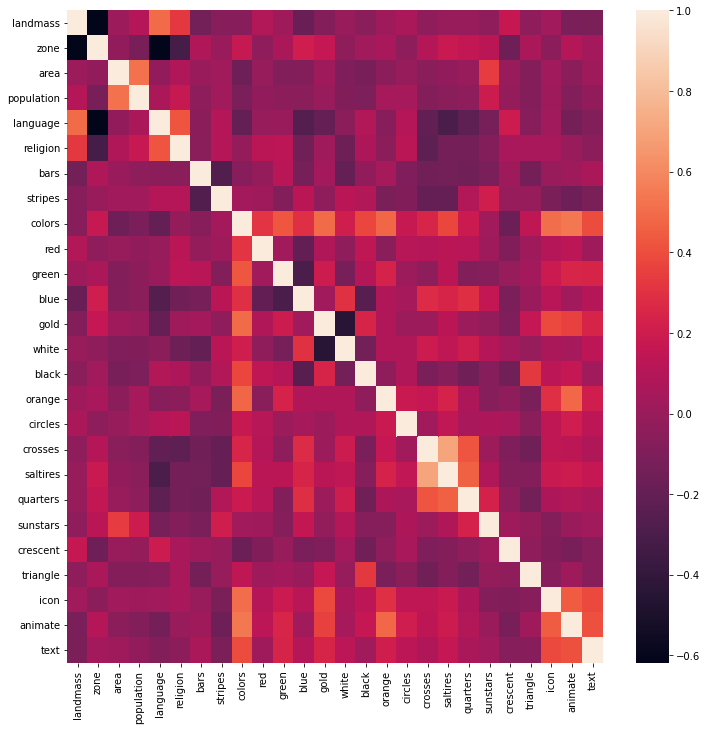

In [ ]:
df_matrix = modified_df.astype(float).corr()
plt.figure(figsize = (12,12))
sns.heatmap(df_matrix,annot_kws={'size': 9})

#### b. by using pivot tables (two way tables)

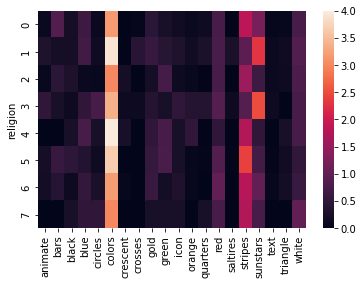

In [ ]:
### I've decided to not create a function here, the code needed for each heatmap is a oneline after all
### Other than the fact that I will need to call the function once in each cell (without the using of for loops)
### Because each cell will display only one drawing/heatmap
sns.heatmap(pd.pivot_table(data=modified_df.drop(["landmass","area","population","language","zone"],axis=1),index=['religion']))
#Reading the heatmap tells us that religion 3 "Buddhist" countries has the greatest number of sunstars in thier flags (around 3 on average)
#and after that comes the other christian (non catholic) countries, on average they have 2.5~ sunstars on each of their flags
#for the Ethnic countries, it apprears that the have the most amount of stripes in the flags.. and the rest of religions appear to be in the same average range
#religion 1 and 4, (other christian/non catholic and hindu) countries appear to have the most colorful (or the most amount of colors) in their flags

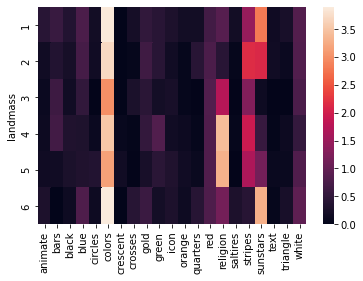

In [ ]:
#landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
sns.heatmap(pd.pivot_table(data=modified_df.drop(["area","population","language","zone"],axis=1),index=['landmass']))
#the heatmap implies that countries in North America and Oceania have the most amount of colors present in thier flags
#studying the relation between landmass and religion in the heatmap would be useless since the function computes the average of the instances per each landmass value
#Countries in South america has the most number of stripes in their flags on average and vice versa for Oceania countries
#(Oceania countries have the least number of stripes present in their flags, on average as well..)
#Oceania countries also have the most number of sunstars present in their flags..


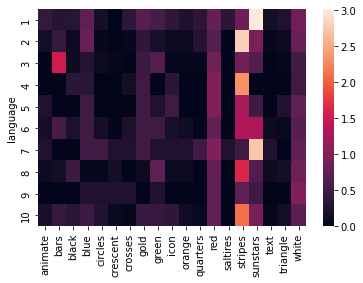

In [ ]:
#language 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European
#         7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others

###Note that I dropped the colors column here because It's making the scale values increase.
###And by that reading the other columns in the heatmap is harder because their values are
###relatively close to each other on the heatmap scale

sns.heatmap(pd.pivot_table(data=modified_df.drop(["area","population","zone","landmass","religion","colors"],axis=1),index=['language']))
#First thing you can notice is that french countries are the only ones with the high average of bars present in their flag..
#And spanish countries have the MOST number of stripes preset in their countries,
#for English and Chinese countries, their flags clearly appear to be having more sunstars than the non English or non Chinese speaking countries..

# finding the max and min for some features

In [ ]:
# it would be useful to know the maximum and the minimum number for the numeric features.
print(modified_df['area'].agg({'max_values':max,'min_values':min}))
max_value=modified_df['area'].max() # finding the maximum area between the countries
modified_df.loc[(modified_df['area']==max_value)] # finding out which country has the largest area
max_value1=modified_df['population'].max()
modified_df.loc[(modified_df['population']==max_value1)] # finding out which country has the largest population
# we do the same thing for the minimum and other numeric values e.g crosses, circles, quarters,saltires


max_values    22402
min_values        0
Name: area, dtype: int64


,landmass,zone,area,population,language,religion,bars,stripes,colors,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
37,5,1,9561,1008,7,6,0,0,2,1,...,0,0,0,0,5,0,0,0,0,0


In [ ]:
df.describe() # describing the dataframe

,name,landmass,zone,area,population,language,religion,bars,stripes,colors,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
count,194,194,194,194,194,194,194,194,194,194,...,194,194,194,194,194,194,194,194,194,194
unique,194,7,5,136,49,11,9,6,13,9,...,3,4,15,3,3,3,3,3,7,9
top,Afghanistan,4,1,0,0,10,1,0,0,3,...,0,0,0,0,0,0,0,0,red,red
freq,1,52,90,34,56,45,60,158,110,75,...,175,167,114,182,166,145,154,177,56,69


# making some visualisation for the data

histogram function

In [ ]:
def plt_hist(df,ft,xlabel,ylabel):
  plt.hist(df[ft],bins=30)
  plt.grid(True)
  plt.xlabel(xlabel,fontsize=30,c='black')
  plt.ylabel(ylabel,fontsize=20,c='black')
  plt.figure(figsize=(20,20))
  plt.show

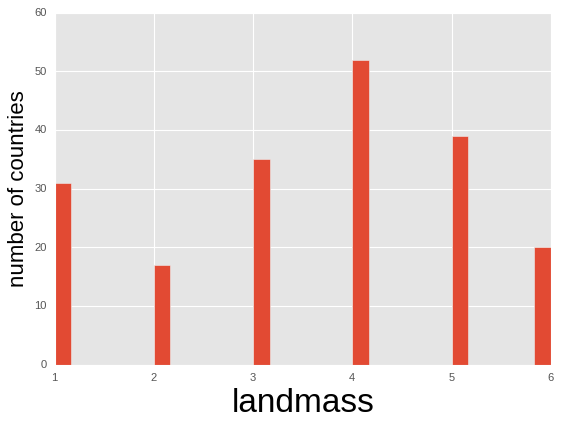

<Figure size 1600x1600 with 0 Axes>

In [ ]:
 # this visualisation represents which continent has the most countries in it(only in our dataframe)
 # 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
plt.style.use('ggplot')
plt_hist(modified_df,'landmass','landmass','number of countries')
# africa has the most countries in it


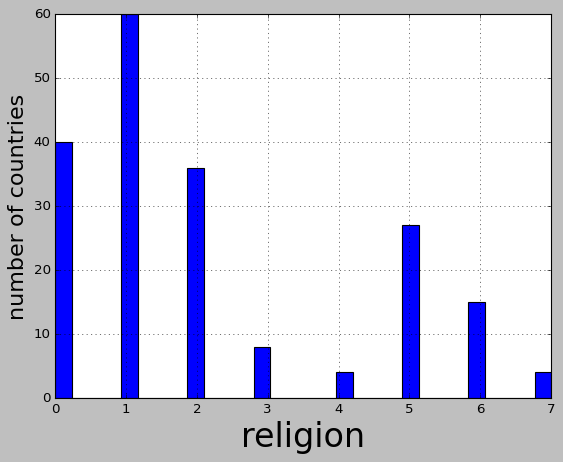

<Figure size 1600x1600 with 0 Axes>

In [ ]:
# this visualisation represents each religion and number of countries that has this religion
#0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
plt.style.use('classic')
plt_hist(modified_df,'religion','religion','number of countries')

pie function

In [ ]:
def plt_pie(df,ft,label1,label2): # a function to make a pie visualisation
 labels=[label1,label2]
 df[ft].value_counts().plot(kind='pie',figsize=(8,8),labels=labels,autopct='%1.1f%%')

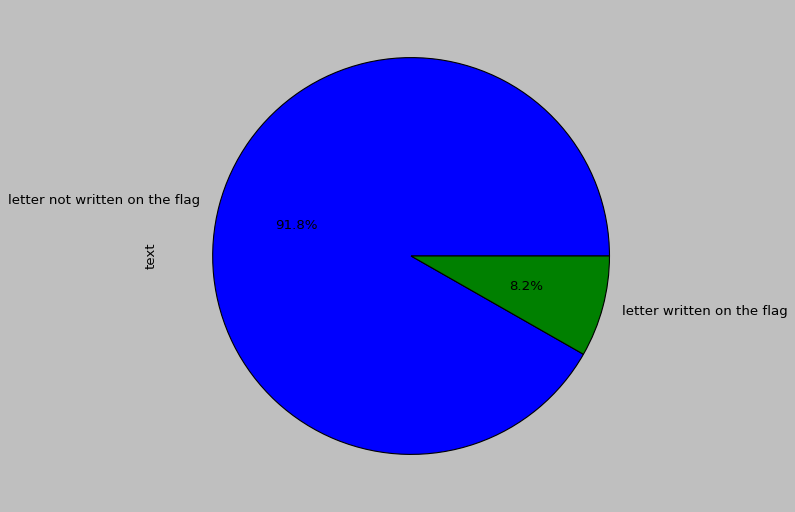

In [ ]:
# this visulisation represent the percentage of countries if there is a letter written on its flag or not
plt.style.use('fast')
plt_pie(modified_df,'text','letter not written on the flag','letter written on the flag')


In [ ]:
modified_df['crosses'] # taking a look on the crosses


0      0
1      0
2      0
3      0
4      0
      ..
189    0
190    0
191    0
192    0
193    0
Name: crosses, Length: 194, dtype: object

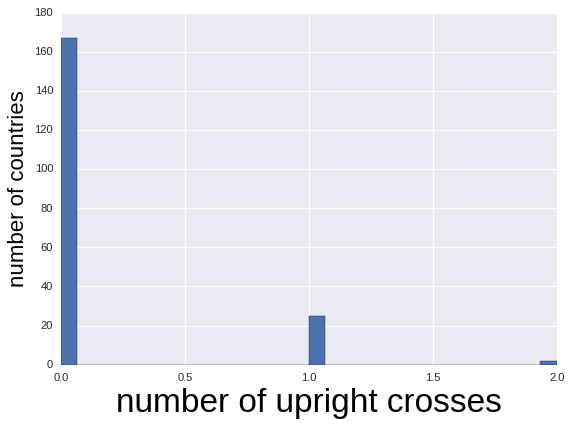

<Figure size 1600x1600 with 0 Axes>

In [ ]:
plt.style.use('seaborn')
plt_hist(modified_df,'crosses','number of upright crosses','number of countries')
# this visualization shows us how many country has different numbers of upright crosses on it flag


In [ ]:
# taking a look on area
modified_df['area']

0       648
1        29
2      2388
3         0
4         0
       ... 
189       3
190     256
191     905
192     753
193     391
Name: area, Length: 194, dtype: object

In [ ]:
# taking a look on population
modified_df['population']

0      16
1       3
2      20
3       0
4       0
       ..
189     0
190    22
191    28
192     6
193     8
Name: population, Length: 194, dtype: object

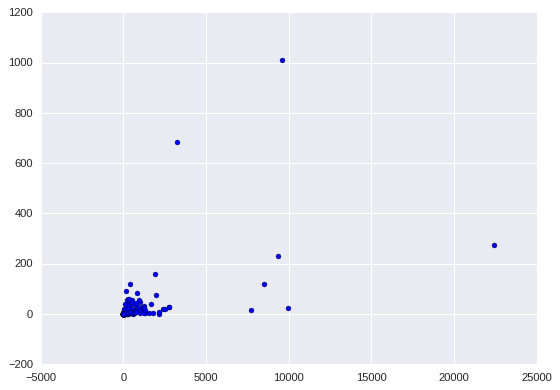

In [ ]:
# after studying the data there might be a relation bewteen some features e.g population and country area
plt.scatter(modified_df['area'],modified_df['population'])
# from this visualization there is no relation between the area and population

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


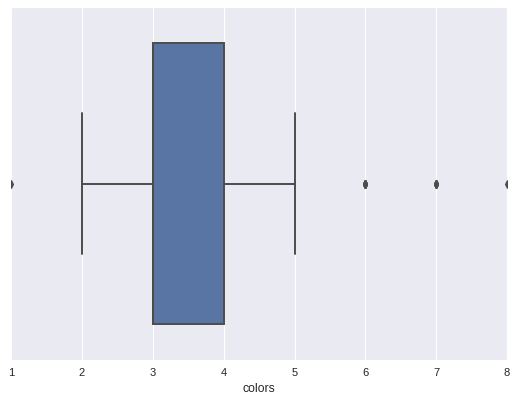

In [ ]:
sns.boxplot(modified_df['colors']) # we can see there is some outliers so we have to solve them

a function that return a list of indeces that has outliers

In [ ]:
# define a function called "outliers" which returns a list of index of outliers
#IQR=Q3-Q1
#+/-1.5*IQR
def outliers(df,ft):
  Q1=df[ft].quantile(0.25)
  Q3=df[ft].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  lst=df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
  return lst

In [ ]:
index_list=[] # a list that stores the indeces that have outliers in "colors" feature

for feature in modified_df.columns:
  index_list.extend(outliers(modified_df,feature))


In [ ]:
index_list #printing the indeces that have outliers

[2,
 5,
 8,
 9,
 10,
 23,
 31,
 35,
 37,
 54,
 69,
 81,
 82,
 83,
 100,
 107,
 112,
 115,
 125,
 136,
 146,
 153,
 162,
 183,
 184,
 14,
 23,
 37,
 51,
 59,
 65,
 81,
 82,
 83,
 87,
 90,
 112,
 126,
 132,
 137,
 138,
 154,
 156,
 170,
 175,
 180,
 183,
 184,
 188,
 2,
 4,
 15,
 16,
 30,
 31,
 32,
 34,
 35,
 59,
 60,
 72,
 73,
 74,
 76,
 85,
 87,
 88,
 98,
 103,
 107,
 108,
 112,
 115,
 126,
 132,
 136,
 142,
 143,
 147,
 157,
 161,
 178,
 186,
 192,
 68,
 99,
 105,
 181,
 183,
 17,
 19,
 24,
 33,
 48,
 56,
 57,
 71,
 78,
 100,
 116,
 135,
 142,
 158,
 164,
 176,
 182,
 187,
 6,
 8,
 9,
 12,
 15,
 22,
 23,
 39,
 44,
 52,
 58,
 62,
 68,
 72,
 77,
 81,
 85,
 86,
 89,
 100,
 109,
 110,
 113,
 119,
 120,
 124,
 125,
 126,
 132,
 141,
 144,
 146,
 149,
 151,
 152,
 157,
 160,
 161,
 165,
 169,
 181,
 1,
 4,
 5,
 12,
 14,
 15,
 16,
 18,
 21,
 27,
 30,
 32,
 35,
 37,
 38,
 40,
 50,
 54,
 62,
 64,
 65,
 66,
 70,
 73,
 74,
 76,
 89,
 92,
 100,
 101,
 104,
 107,
 110,
 111,
 115,
 117,
 143,
 145

a function that remove the outliers

In [ ]:
def remove(df,lst):
  lst=sorted(set(lst))
  df=df.drop(lst) #dropping the indeces that have outliers
  return df

In [ ]:
cleaned_df=remove(modified_df,index_list) # the outliers are removed

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


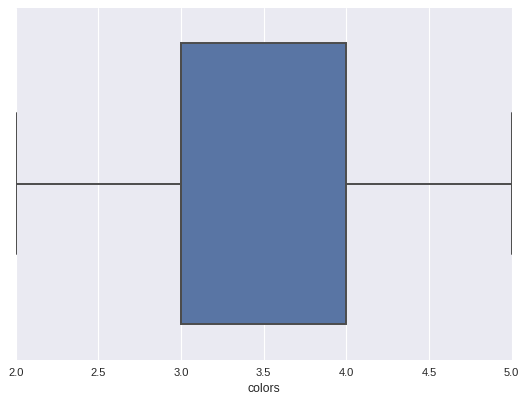

In [ ]:

sns.boxplot(cleaned_df['colors']) # making a boxplot for "color features" without outliers

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


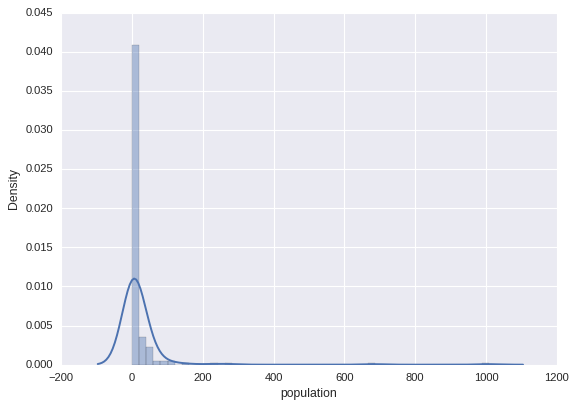

In [ ]:
sns.distplot(modified_df['population']) # showing how is the population distributed